In [62]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import math
import skimage.io as imutils
%matplotlib inline
from keras.models import load_model
from keras.preprocessing import image as keras_preprocess
from keras.preprocessing import image as img
import os

In [63]:
#Image structure = > (Height, Width, Color_Channel)
cat_image = Image.open('custom_test/dog.6.jpg')
#Load the Classifier
classifier = load_model('my_model.h5')

# Returns the labels for the classes according to the folder structre of clases
def get_labels_for_clases():
    #return ['car', 'cat', 'dog', 'shoe']
    return ['car' ,'cat', 'dog']

# Run prediction for a single image
def predict_for_single_image(image):
    #lable the images according the folder structure

    lables = get_labels_for_clases()
    out = classifier.predict_classes(image, verbose=0)
    return lables[out[0]]

#Prepreprocess image    
def preprocess_image(file_path):
    cropped_image = keras_preprocess.load_img(file_path, target_size=((64, 64)))
    cropped_image = keras_preprocess.img_to_array(cropped_image)
    cropped_image = np.expand_dims(cropped_image, axis=0)
    return cropped_image

In [64]:
#save the image cordinates in a dictionary
image_cordinates_grid = {}

image_dimention_width = cat_image.size[0]
image_dimention_height = cat_image.size[1]

#if 100 x 100 window were to slide thought the image, identify the parameters for the loop condition
slide_window_height_and_width = (256, 256)

#Convert the image in to an numpy array
image_array = np.array(cat_image)

row_count_after_substraction = math.ceil(image_array.shape[0] / slide_window_height_and_width[0])
col_count_after_substraction = math.ceil(image_array.shape[1] / slide_window_height_and_width[1])

#Initialize x, y, w, h values
x, y, w, h = 0, 0, slide_window_height_and_width[1], slide_window_height_and_width[0]
count = 0
print("Image will be transformed in to a", row_count_after_substraction, "x", col_count_after_substraction, "grid")
for row in range(0, row_count_after_substraction):
    for col in range(0, col_count_after_substraction):
        
        #Change the X and Y locations respectivly to add the sliding window effect.
        cropped_image = image_array[y : y + h, x : x + w]
        saving_image = cropped_image
        #Save the image
        imutils.imsave("custom_test/cutted/" + str(count) + ".jpg",cropped_image)
        image_cordinates_grid[str(count) + '_rect'] = (x, y, w, h)

        cropped_image = preprocess_image('custom_test/cutted/' + str(count) + ".jpg")
        image_cordinates_grid[str(count) + '_prediction'] = predict_for_single_image(cropped_image)
        
        #Delete existing image
        os.remove("custom_test/cutted/" + str(count) + ".jpg")
        #Lable image
        imutils.imsave("custom_test/cutted/" + str(count) + "_" + predict_for_single_image(cropped_image) + ".jpg",saving_image)
        x = x + w
        count = count + 1
    x = 0
    y = y + h

Image will be transformed in to a 3 x 5 grid


In [65]:
image_cordinates_grid

{'0_prediction': 'car',
 '0_rect': (0, 0, 256, 256),
 '10_prediction': 'dog',
 '10_rect': (0, 512, 256, 256),
 '11_prediction': 'dog',
 '11_rect': (256, 512, 256, 256),
 '12_prediction': 'dog',
 '12_rect': (512, 512, 256, 256),
 '13_prediction': 'dog',
 '13_rect': (768, 512, 256, 256),
 '14_prediction': 'dog',
 '14_rect': (1024, 512, 256, 256),
 '1_prediction': 'dog',
 '1_rect': (256, 0, 256, 256),
 '2_prediction': 'cat',
 '2_rect': (512, 0, 256, 256),
 '3_prediction': 'dog',
 '3_rect': (768, 0, 256, 256),
 '4_prediction': 'dog',
 '4_rect': (1024, 0, 256, 256),
 '5_prediction': 'cat',
 '5_rect': (0, 256, 256, 256),
 '6_prediction': 'cat',
 '6_rect': (256, 256, 256, 256),
 '7_prediction': 'dog',
 '7_rect': (512, 256, 256, 256),
 '8_prediction': 'dog',
 '8_rect': (768, 256, 256, 256),
 '9_prediction': 'car',
 '9_rect': (1024, 256, 256, 256)}

In [67]:
#Extract the relevent image cell to its corresponding prediction
iteration_size = math.ceil(len(image_cordinates_grid) / 2)
combined_grid = {}
#Compare adjesent cells for the same prediction and combine them
for i in range(0, iteration_size - 1):
    if image_cordinates_grid[str(i) + '_prediction'] == image_cordinates_grid[str(i + 1) + '_prediction']:
        #Join the regions
        cordinate_1 = image_cordinates_grid[str(i) + '_rect']
        cordinate_2 = image_cordinates_grid[str(i + 1) + '_rect']
        print("cordinate_1 : ",cordinate_1)
        print("cordinate_2 : ",cordinate_2)
        #Join in X axis
        
        if cordinate_1[1] == cordinate_2[1]:
           
            combined_grid[str(i) + '_rect'] = (cordinate_1[0], cordinate_1[1], cordinate_1[2] + cordinate_2[2], cordinate_1[3])
        #Join in Y axix
        
        if cordinate_1[0] == cordinate_2[0]:
            print("came to else if")
            combined_grid[str(i) + '_rect'] = (cordinate_1[0], cordinate_1[1],cordinate_1[2], cordinate_1[3] + cordinate_2[3])

cordinate_1 :  (768, 0, 256, 256)
cordinate_2 :  (1024, 0, 256, 256)
cordinate_1 :  (0, 256, 256, 256)
cordinate_2 :  (256, 256, 256, 256)
cordinate_1 :  (512, 256, 256, 256)
cordinate_2 :  (768, 256, 256, 256)
cordinate_1 :  (0, 512, 256, 256)
cordinate_2 :  (256, 512, 256, 256)
cordinate_1 :  (256, 512, 256, 256)
cordinate_2 :  (512, 512, 256, 256)
cordinate_1 :  (512, 512, 256, 256)
cordinate_2 :  (768, 512, 256, 256)
cordinate_1 :  (768, 512, 256, 256)
cordinate_2 :  (1024, 512, 256, 256)


In [68]:
#Order the grid to have identical key numberings
combined_grid

{'10_rect': (0, 512, 512, 256),
 '11_rect': (256, 512, 512, 256),
 '12_rect': (512, 512, 512, 256),
 '13_rect': (768, 512, 512, 256),
 '3_rect': (768, 0, 512, 256),
 '5_rect': (0, 256, 512, 256),
 '7_rect': (512, 256, 512, 256)}

In [70]:
#Clean Directory
[os.remove("custom_test/cutted/"+ x) for x in os.listdir("custom_test/cutted/")]

#Run the 2nd wave predictions for the combined images
for i, (key, value) in enumerate(combined_grid.items()):
    x, y, w, h = value
    image = image_array[y : y + h, x : x + w]
    path = "custom_test/cutted/" + str(i) + ".jpg"
    imutils.imsave(path ,image)
    
    pred = predict_for_single_image(preprocess_image(path))
    os.remove(path)
    imutils.imsave("custom_test/cutted/" + str(i) + "_" + pred + ".jpg",image)

In [26]:
#Draw bounding boxes on the image from the identified regions

In [71]:
combined_grid

{'10_rect': (0, 512, 512, 256),
 '11_rect': (256, 512, 512, 256),
 '12_rect': (512, 512, 512, 256),
 '13_rect': (768, 512, 512, 256),
 '3_rect': (768, 0, 512, 256),
 '5_rect': (0, 256, 512, 256),
 '7_rect': (512, 256, 512, 256)}

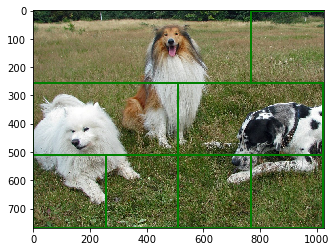

In [72]:
fig, ax =plt.subplots(1)

ax.imshow(image_array)

for key,value in combined_grid.items():
    x, y, w, h = value
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

plt.show()

In [73]:
# import the necessary packages
import numpy as np
 
# Malisiewicz et al.
def non_max_suppression_fast(boxes, overlapThresh):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []
 
	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")
 
	# initialize the list of picked indexes	
	pick = []
 
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
 
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)
 
	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
 
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
 
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
 
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
 
		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))
 
	# return only the bounding boxes that were picked using the
	# integer data type
	return boxes[pick].astype("int")

In [74]:
#get all bounding boxes to an array
boundingbox_array = []

for i, (key, value) in enumerate(combined_grid.items()):
    x, y , w, h = value
    boundingbox_array.append(np.array((x,y,w,h)))
    
boundingbox_array = np.array(boundingbox_array)

In [75]:
boundingbox_array

array([[256, 512, 512, 256],
       [512, 512, 512, 256],
       [512, 256, 512, 256],
       [768, 512, 512, 256],
       [  0, 512, 512, 256],
       [  0, 256, 512, 256],
       [768,   0, 512, 256]])

In [76]:
pick = non_max_suppression_fast(boundingbox_array,0.2)

In [77]:
pick

array([[768,   0, 512, 256],
       [  0, 256, 512, 256],
       [  0, 512, 512, 256],
       [768, 512, 512, 256],
       [512, 512, 512, 256],
       [256, 512, 512, 256]])

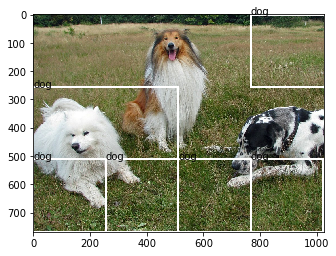

In [84]:
fig, ax =plt.subplots(1)
ax.imshow(image_array)

for (x,y,w,h) in pick:
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='w', facecolor='none')
    plt.text(x, y, "dog")
    ax.add_patch(rect)

plt.show()